In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [4]:
import pandas as pd
import seaborn as sns
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
)
from tensorflow.keras.regularizers import L2

2.11.0


In [5]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
target = df.pop('label')

In [6]:
target

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
target.shape

(42000,)

In [8]:
target.head

<bound method NDFrame.head of 0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64>

In [9]:
df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
df.head

<bound method NDFrame.head of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0  

In [12]:
df.tail

<bound method NDFrame.tail of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0  

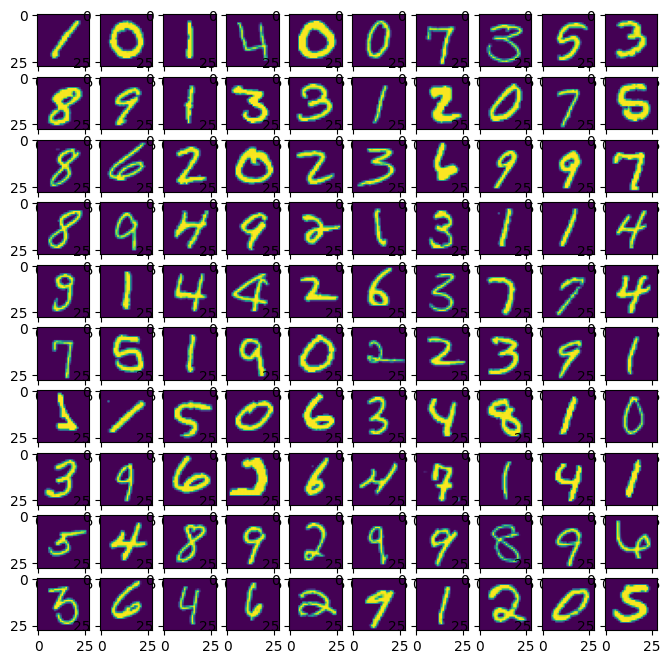

In [13]:
def scale_pixels(X):
    # convert from integers to floats
    return X.astype('float32') / 255.0

def prep_data(X):
    # Normalize the data
    X = scale_pixels(X)
    
    # Reshape 784 pixels into 28x28x1 shape (BW image of 28 pixels by 28 pixels)
    X = X.values.reshape(-1,28,28,1)
    return X

digits = prep_data(df)
target = pd.get_dummies(target)

fig, axes = plt.subplots(10,10, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits[i])

In [14]:
# Split data into train and validation sets (train and validation)
X_train, X_test, y_train, y_test = train_test_split(digits, target, train_size=0.8, random_state=42,shuffle=True)

In [15]:
def define_model():
    model = Sequential(
    [
        # Layer 1
        Conv2D(
            filters=32,
            kernel_size=(3, 3),
            strides=1,
            activation="relu",
            input_shape=(28, 28, 1),
            kernel_regularizer='l2',
        ),
        # Layer 2
        Conv2D(filters=32, kernel_size=(3, 3), strides=1,activation="relu"),

        # Layer 3
#         BatchNormalization(),
  
#         Activation("relu"),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.25),
     
        # Layer 3
        Conv2D(
            filters=64,
            kernel_size=3,
            strides=1,
            activation="relu", kernel_regularizer='l2',
        ),
        
        # Layer 4
 Conv2D(filters=64, kernel_size=3, strides=1, use_bias=False),
        
        # Layer 5
          BatchNormalization(),
   
        Activation("relu"),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.25),
        Flatten(),
       
        # Layer 6
        Dense(units=256, use_bias=False),
        
        # Layer 7
        BatchNormalization(),
     
        Activation("relu"),
  
        # Layer 8
        Dense(units=128, use_bias=False),
        Dense(units=84, use_bias=False),
     
        Activation("relu"),
        Dropout(0.25),

        # Output
         Dense(units=10, activation="softmax"),
        ]
    )
    return model

In [16]:
model = define_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36864     
                                                        

In [17]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# evaluate a model using k-fold cross-validation
def evaluate_model(X_train, y_train, X_test, y_test):
    # Create model
    model = define_model()
    model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Split Train data in train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=42,shuffle=True)
    
    print("Fitting Model to Data")
    history = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[EarlyStopping(patience=3)])
    
    print("Evaluting Model Performance")
    _, acc = model.evaluate(X_test, y_test)
    
    print(f"Model Accuracy on Test Set: {(acc * 100.0)}")
    return model, acc, history

In [19]:
model, acc, history = evaluate_model(X_train, y_train, X_test, y_test)

Fitting Model to Data
Epoch 1/20
840/840 [==============================] - 43s 50ms/step - loss: 0.3790 - accuracy: 0.9263 - val_loss: 0.1489 - val_accuracy: 0.9726
Epoch 2/20
840/840 [==============================] - 42s 50ms/step - loss: 0.1648 - accuracy: 0.9642 - val_loss: 0.3277 - val_accuracy: 0.9347
Epoch 3/20
840/840 [==============================] - 41s 49ms/step - loss: 0.1371 - accuracy: 0.9705 - val_loss: 0.0825 - val_accuracy: 0.9874
Epoch 4/20
840/840 [==============================] - 41s 49ms/step - loss: 0.1261 - accuracy: 0.9739 - val_loss: 0.1034 - val_accuracy: 0.9805
Epoch 5/20
840/840 [==============================] - 42s 51ms/step - loss: 0.1218 - accuracy: 0.9749 - val_loss: 0.1234 - val_accuracy: 0.9753
Epoch 6/20
840/840 [==============================] - 42s 50ms/step - loss: 0.1142 - accuracy: 0.9761 - val_loss: 0.1065 - val_accuracy: 0.9817
Evaluting Model Performance
263/263 [==============================] - 3s 12ms/step - loss: 0.0959 - accuracy: 0.9

# Kaggle Submission¶

In [20]:
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_submission = prep_data(df_test)
y_pred = model.predict(test_submission)
y_pred = (y_pred >= 0.5).astype(int)
# pd.DataFrame(prediction).to_csv("submission.csv", index=False)

875/875 [==============================] - 10s 12ms/step


In [21]:
y_pred = [np.argmax(x) for x in y_pred]
prediction = pd.DataFrame({"ImageId":df_test.index +1, "Label":y_pred})
prediction.to_csv("submission.csv", header=["ImageId", "Label"], index=False)

In [22]:
prediction

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


(<matplotlib.image.AxesImage at 0x73d7d6497880>,
 ImageId    2
 Label      0
 Name: 1, dtype: int64)

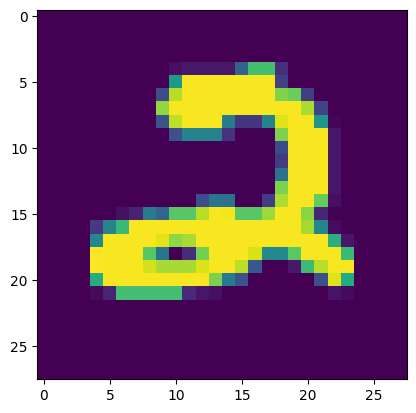

In [23]:
plt.imshow(test_submission[0]), prediction.iloc[1]

(<matplotlib.image.AxesImage at 0x73d7d52daf80>,
 ImageId    2
 Label      0
 Name: 1, dtype: int64)

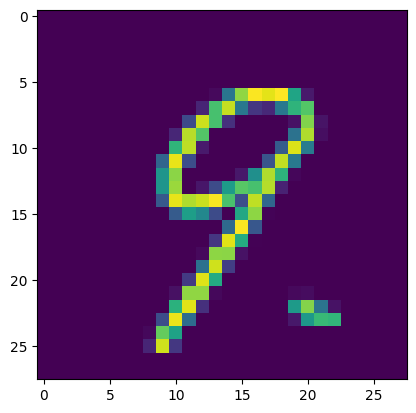

In [24]:
plt.imshow(test_submission[2]), prediction.iloc[1]

(<matplotlib.image.AxesImage at 0x73d7d51fe740>,
 ImageId    2
 Label      0
 Name: 1, dtype: int64)

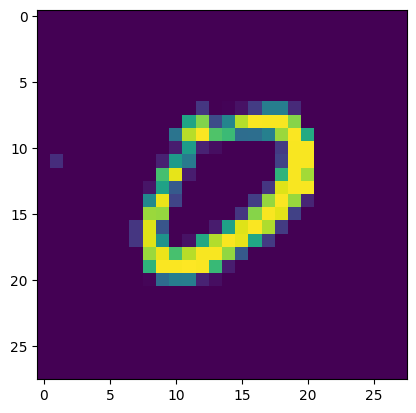

In [25]:
plt.imshow(test_submission[3]), prediction.iloc[1]

(<matplotlib.image.AxesImage at 0x73d7d525d360>,
 ImageId    2
 Label      0
 Name: 1, dtype: int64)

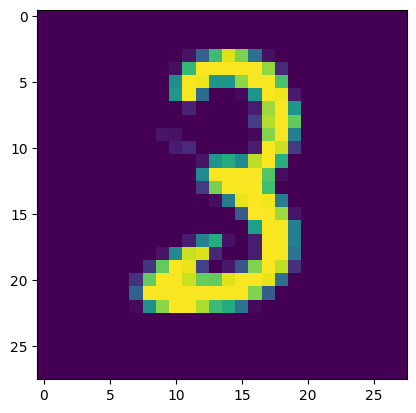

In [26]:
plt.imshow(test_submission[4]), prediction.iloc[1]

(<matplotlib.image.AxesImage at 0x73d7f7178c40>,
 ImageId    2
 Label      0
 Name: 1, dtype: int64)

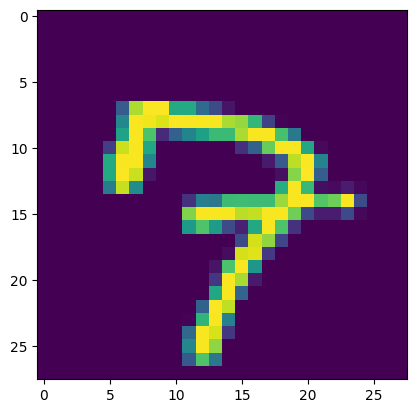

In [27]:
plt.imshow(test_submission[5]), prediction.iloc[1]

(<matplotlib.image.AxesImage at 0x73d7f4b323b0>,
 ImageId    2
 Label      0
 Name: 1, dtype: int64)

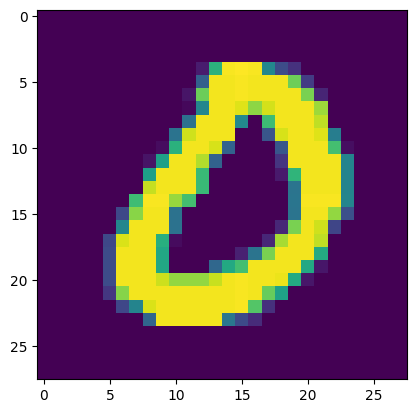

In [28]:
plt.imshow(test_submission[6]), prediction.iloc[1]

(<matplotlib.image.AxesImage at 0x73d7f4713790>,
 ImageId    2
 Label      0
 Name: 1, dtype: int64)

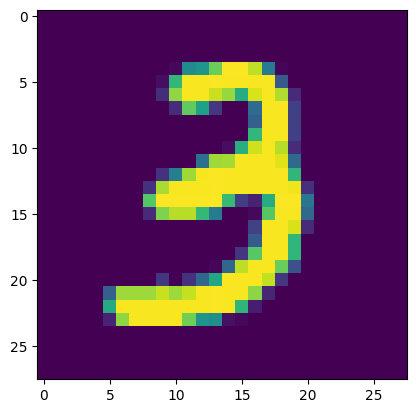

In [29]:
plt.imshow(test_submission[7]), prediction.iloc[1]

(<matplotlib.image.AxesImage at 0x73d7d5b94c70>,
 ImageId    2
 Label      0
 Name: 1, dtype: int64)

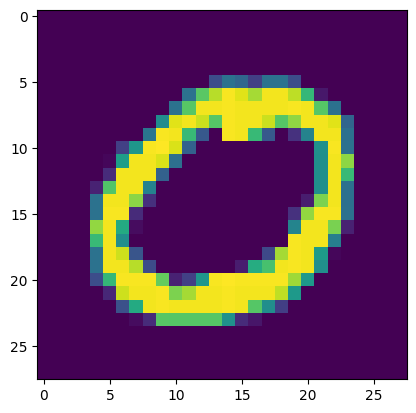

In [30]:
plt.imshow(test_submission[8]), prediction.iloc[1]

(<matplotlib.image.AxesImage at 0x73d7d59f9420>,
 ImageId    2
 Label      0
 Name: 1, dtype: int64)

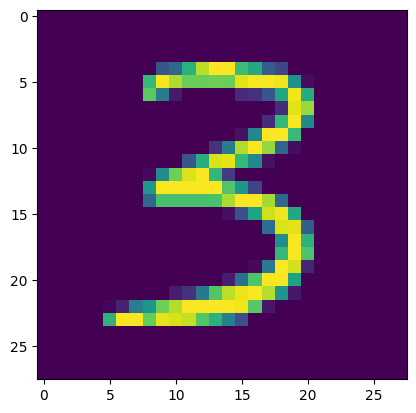

In [31]:
plt.imshow(test_submission[9]), prediction.iloc[1]

(<matplotlib.image.AxesImage at 0x73d7d5a62710>,
 ImageId    2
 Label      0
 Name: 1, dtype: int64)

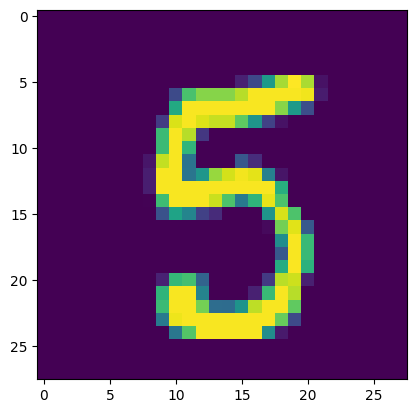

In [32]:
plt.imshow(test_submission[10]), prediction.iloc[1]

In [33]:
df_test= pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [34]:
df_test.head(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_test.tail(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


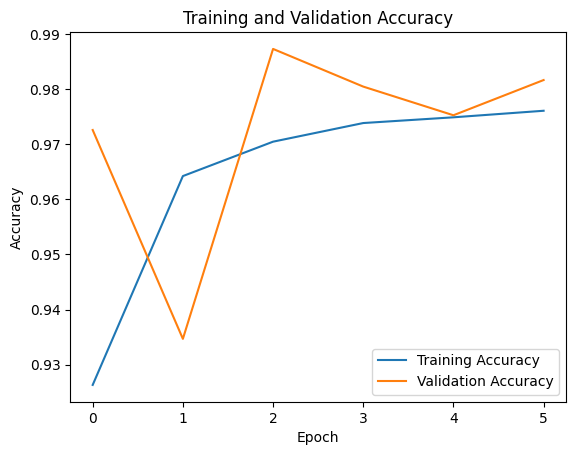

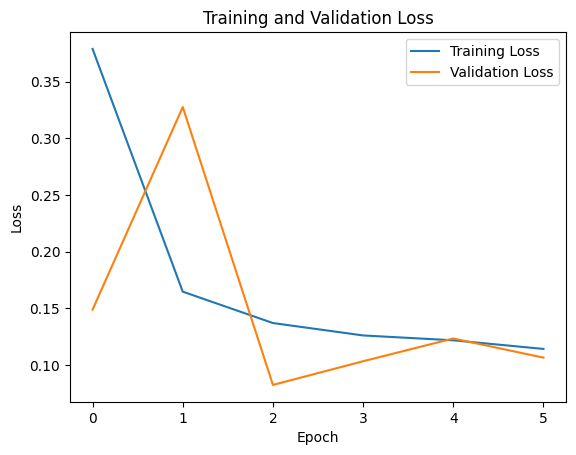

In [36]:
# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

263/263 [==============================] - 3s 11ms/step


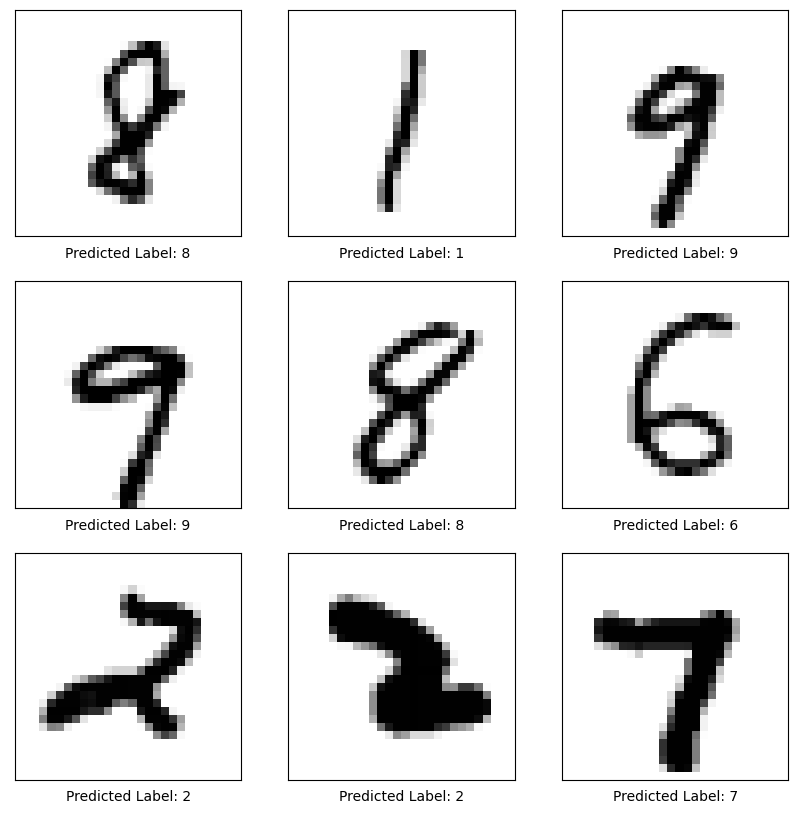

In [37]:
# Get the predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions to integer labels
y_pred = np.argmax(y_pred, axis=1)

# Plot some examples of the test set with their predicted labels
num_examples = 9
plt.figure(figsize=(10,10))
for i in range(num_examples):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel('Predicted Label: {}'.format(y_pred[i]))
plt.show()